# Live Code 3
Nama    : Rizky Chester Abadi

Batch   : RMT-029

Program ini dibuat untuk menganalisis data dari bigquery dan melakukan perhitungan seperti mencari central tendency, cek skewnes dan akhirnya akan diconvert dalam file .csv

In [20]:
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
auth.authenticate_user()
print('Authenticated')

project_id = "caramel-feat-415109"
client = bigquery.Client(project=project_id)


Authenticated


Membuat koneksi dengan data dari Bigquery yang diambil datanya

In [31]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Mengimport ekstensi tambahan untuk melakukan analisa

In [22]:
query ="""
SELECT *
FROM `bigquery-public-data.iowa_liquor_sales.sales`
LIMIT 5000
"""

# Set up the query
df1 = client.query(query).to_dataframe()
df1

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-23023600076,2019-11-05,3723,J D SPIRITS LIQUOR,1023 9TH ST,ONAWA,51040.0,POINT(-96.095845 42.025841),67,MONONA,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.00
1,INV-35063300013,2021-03-16,3723,J D SPIRITS LIQUOR,1023 9TH ST,ONAWA,51040.0,POINT(-96.095845 42.025841),67,MONONA,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.00
2,INV-43494000008,2022-01-03,5102,WILKIE LIQUORS,724 1ST ST SE,MOUNT VERNON,52314.0,POINT(-91.410401 41.918328),57,LINN,...,100413,FIREBALL CINNAMON WHISKEY PARTY BUCKET,1,50,51.60,77.40,1,77.40,0.05,0.01
3,INV-57342400001,2023-04-07,5724,CASEY'S GENERAL STORE #3772,105 SOUTH 18TH STREET,CENTERVILLE,52544.0,POINT(-92.867379968 40.7322790010001),None,APPANOOSE,...,100413,FIREBALL CINNAMON WHISKEY PARTY BUCKET,1,50,51.60,77.40,1,77.40,0.05,0.01
4,INV-57413500001,2023-04-11,6019,CASEY'S GENERAL STORE #3888 / ANKENY,1024 E 1ST ST,ANKENY,50021.0,POINT(-93.581705035 41.732371017),None,POLK,...,100413,FIREBALL CINNAMON WHISKEY PARTY BUCKET,1,50,51.60,77.40,1,77.40,0.05,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,INV-22450200019,2019-10-10,2515,HY-VEE FOOD STORE #1 / MASON CITY,2400 4TH ST SW,MASON CITY,50401.0,POINT(-93.235588 43.148451),17,CERRO GORDO,...,39500,WESTERN SON RASPBERRY VODKA MINI,6,50,4.83,7.25,3,21.75,0.15,0.03
4996,INV-47572400168,2022-05-18,2629,HY-VEE FOOD STORE #2 / COUNCIL BLUFFS,1745 MADISON AVE,COUNCIL BLUFFS,51503.0,POINT(-95.827277 41.244233),78,POTTAWATTAMIE,...,39555,DEEP EDDY LEMON MINI,12,50,4.21,6.32,3,18.96,0.15,0.03
4997,INV-43760400008,2022-01-13,4656,CASEY'S GENERAL STORE #2301 / AMES,17005 HWY 69,AMES,50010.0,None,85,STORY,...,39555,DEEP EDDY LEMON MINI,12,50,4.21,6.32,3,18.96,0.15,0.03
4998,INV-45880700038,2022-03-24,2691,HY-VEE FAST & FRESH - DES MOINES,5801 HICKMAN ROAD,URBANDALE,50322.0,POINT(-93.698172 41.614888),77,POLK,...,39555,DEEP EDDY LEMON MINI,12,50,4.21,6.32,3,18.96,0.15,0.03


Mengambil data dari bigquery dan menyimpannya sebagai dataframe

In [26]:
query ="""
SELECT  sale_dollars
FROM `bigquery-public-data.iowa_liquor_sales.sales`
LIMIT 5000
"""

# Set up the query
dfsd = client.query(query).to_dataframe()
dfsd

,sale_dollars
0,7.40
1,7.40
2,77.40
3,77.40
4,77.40
...,...
4995,21.75
4996,18.96
4997,18.96
4998,18.96


Membuat Dataframe baru untuk kolom sale_dollars saja, dan membatasi sebanyak 5000 baris

### A.Analisis Anomali

In [29]:
#Menghitung Central Tendency Mean, median, mode
print('sale_dollars in average :',dfsd['sale_dollars'].mean(),'sale')
print('Median of sale_dollars :',dfsd['sale_dollars'].median(),'sale')
print('mode of sale_dollars :',dfsd['sale_dollars'].mode(),'sale')

sale_dollars in average : 28.369947999999997 sale
Median of sale_dollars : 16.62 sale
mode of sale_dollars : 0    77.4
Name: sale_dollars, dtype: float64 sale


Kolom sale_dollars memiliki nilai mean: 28.37, nilai median: 16.62 dan modus: 77.4(Mean = rata-rata, median= nilai tengah, modus= nilai yang sering keluar)

In [30]:
# Cek Skewnes
print(f"Skewness:{dfsd['sale_dollars'].skew()}" )

Skewness:3.266708946225033


Pengecekan Skewness dari data pada kolom safe_dollars memiliki nilai skewness sebesar 3.27 (setelah pembulatan) dan memiliki nilai skewness diatas 0.5 yang artinya higly skewnes

<Axes: >

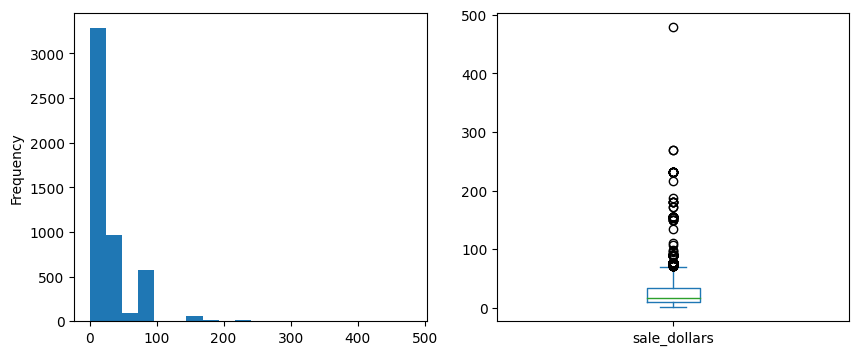

In [32]:
# Analisa dengan Extreme Value Analysis
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

dfsd['sale_dollars'].plot(kind='hist',bins=20,ax=ax[0])
dfsd['sale_dollars'].plot(kind='box',ax=ax[1])

hasil grafik dengan metode extreme value analysis, menyimpulkan bahwa terdapat anomali/outlier yang tinggi dalam data

In [36]:
# menggunakan Normal Distribution Z-Score
avg = dfsd['sale_dollars'].mean() #menghitung lagi nilai rata-rata
std = dfsd['sale_dollars'].std() #menghitung standard deviaasi

up_bound = avg + 3*std
low_bound = avg - 3*std

print(f'Upper Boundary: {up_bound:.2f}' ) #2f berarti 2angka dibelakang koma
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 118.83
Lower Boundary: -62.09


Hasil penghitungan dengan mencari upper boundary dan lower boundarynya

In [38]:
#Menghitung presentase outlier
outlier = dfsd['sale_dollars'][(dfsd['sale_dollars']<low_bound) | (dfsd['sale_dollars']>up_bound)]
no_outlier = dfsd['sale_dollars'][(dfsd['sale_dollars']>=low_bound) & (dfsd['sale_dollars']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(dfsd["sale_dollars"]):.2f}%%') #menampilkan presentasi outlier dengan dua angka dibelakang koma

Percentage of outliers: 1.68%%


presentasi outlier sebesar 1.68% data sale_dollars tanpa outlier di simpan dalam no_outlier

<Axes: >

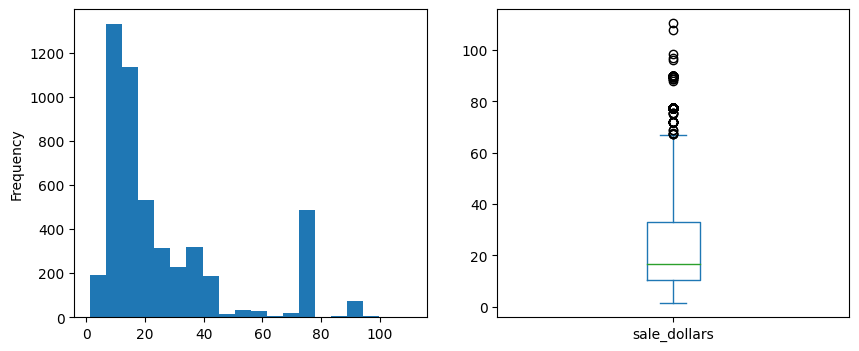

In [39]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_outlier.plot(kind='hist',bins=20,ax=ax[0])
no_outlier.plot(kind='box',ax=ax[1])

Hasil grafik dengan menggunakan distribution Z-Score memperlihatkan masih ada outlier

In [44]:
# Menggunakan Skew Distribution: Tukey's Rule
q1 = dfsd['sale_dollars'].quantile(0.25) # menghitung quantile 1
q3 = dfsd['sale_dollars'].quantile(0.75) # menghitung quantile 3
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 70.50
Lower Boundary: -25.50


Menghitung Upper dan Lower Boundary dari outlier dan membuat variable sementara  tanpa outlier bernama no_outlier2

In [46]:
outlier = dfsd['sale_dollars'][(dfsd['sale_dollars']<low_bound) | (dfsd['sale_dollars']>up_bound)]
no_outlier2 = dfsd['sale_dollars'][(dfsd['sale_dollars']>=low_bound) & (dfsd['sale_dollars']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(dfsd["sale_dollars"]):.2f}%%')

Percentage of outliers: 13.40%%


Presentasi outlier masih ada sebesar 13.40%

<Axes: >

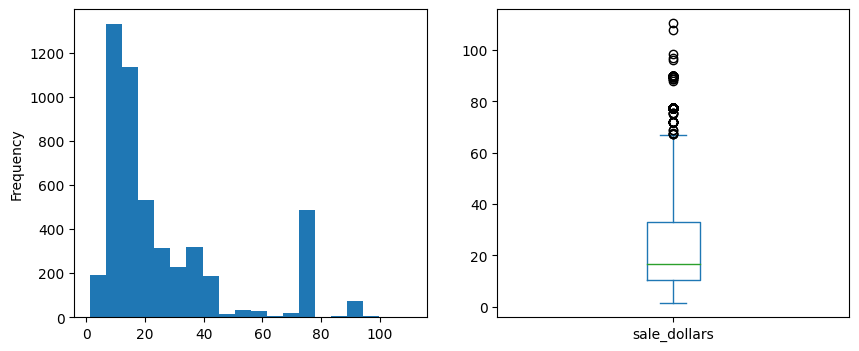

In [47]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_outlier.plot(kind='hist',bins=20,ax=ax[0])
no_outlier.plot(kind='box',ax=ax[1])

In [42]:
no_outlier.to_csv('RizkyChester.csv', index=False)

Mengconvert data yang telah dikeluarkan outliernya kedalam bentuk csv

## B.Pertanyaan

1.Berapa rata-rata, median, dan modus dari data tersebut sebelum dihilangkan outliernya? Bagaimana kecerendungan pemusatan datanya? jelaskan jawabanmu!

2.Sebelum melakukan extreme value analysis, kamu harus melakukan pengecekan skewness dari distribusi datanya. Apakah datanya skew atau normal? jelaskan jawabanmu!

3.Ada dua teknik untuk melakukan extreme value analysis, teknik yang mana yang kamu pakai? berikan alasanmu berdasarkan data!



#### Jawaban

1. Nilai Mean(rata-rata), Median,dan modusnya sebelum dihilangkan outliernya adalah nilai mean: 28.37, nilai median: 16.62 dan modus: 77.4

2. Datanya merupakan data yang highly Skew karena memiliki nilai skewness sebesar 3.27 yang lebih besar dari 0.5

3. Teknik extreme value analysis yang saya gunakan adalah Normal Distribution Z-Score, saya menggunakan teknik ini karena hasil data outliernya masih ada namun lebih sedikit dibandingkan dengan menggunakan Skew Distribution: Tukey Rule